In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
diabetes = pd.read_csv("datasets/diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes = diabetes.sample(frac = 1)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
723,5,117,86,30,105,39.1,0.251,42,0
32,3,88,58,11,54,24.8,0.267,22,0
200,0,113,80,16,0,31.0,0.874,21,0
345,8,126,88,36,108,38.5,0.349,49,0
514,3,99,54,19,86,25.6,0.154,24,0


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 723 to 733
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [5]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
diabetes.shape

(768, 9)

In [7]:
diabetes["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler
diabetes_new = diabetes.drop(["Outcome"], axis = 1)
diabetes_new = diabetes_new.values
diabetes_new
scale = StandardScaler()
diabetes_new_scale = scale.fit_transform(diabetes_new)
diabetes_new_scale

array([[ 0.3429808 , -0.12188771,  0.87340925, ...,  0.90206862,
        -0.66707265,  0.74529338],
       [-0.25095213, -1.02950492, -0.57412775, ..., -0.91287659,
        -0.61875075, -0.95646168],
       [-1.14185152, -0.24707629,  0.56322275, ..., -0.12597727,
         1.21446129, -1.04154944],
       ...,
       [-1.14185152, -0.59134489, -0.26394125, ...,  1.09244749,
         0.07285643, -1.04154944],
       [-0.25095213, -1.27988209,  0.66661825, ...,  0.28016432,
         2.4768709 , -0.53102292],
       [-0.54791859, -0.46615631, -0.67752325, ..., -0.37981576,
        -0.13855188, -0.95646168]])

In [9]:
type(diabetes_new_scale)

numpy.ndarray

In [10]:
outcome = diabetes["Outcome"]
outcome

723    0
32     0
200    0
345    0
514    0
      ..
475    0
591    0
422    0
659    1
733    0
Name: Outcome, Length: 768, dtype: int64

In [11]:
from tensorflow.keras.utils import to_categorical
outcome_enc = tf.keras.utils.to_categorical(outcome)
print(outcome_enc)
print("=========")
print(outcome_enc.shape)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]
(768, 2)


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(diabetes_new_scale, outcome_enc, test_size = 0.2, random_state = 10)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614, 2)
(154, 2)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense

model = Sequential()
model.add(Dense(16, input_shape = (8,)))
model.add(Dropout(0.2))
model.add(Dense(8, activation = "relu"))
model.add(Dense(2, activation = "softmax"))

In [15]:
model.compile(optimizer = "rmsprop",
             loss = "binary_crossentropy",
             metrics = ["accuracy"])

In [16]:
history = model.fit(x_train, y_train, epochs = 50, batch_size = 10 ,validation_split = 0.1, verbose = 2)

Train on 552 samples, validate on 62 samples
Epoch 1/50
552/552 - 1s - loss: 0.6516 - accuracy: 0.6667 - val_loss: 0.5260 - val_accuracy: 0.7581
Epoch 2/50
552/552 - 0s - loss: 0.5507 - accuracy: 0.7409 - val_loss: 0.4567 - val_accuracy: 0.8226
Epoch 3/50
552/552 - 0s - loss: 0.5214 - accuracy: 0.7391 - val_loss: 0.4235 - val_accuracy: 0.8065
Epoch 4/50
552/552 - 0s - loss: 0.4950 - accuracy: 0.7772 - val_loss: 0.4042 - val_accuracy: 0.8065
Epoch 5/50
552/552 - 0s - loss: 0.4950 - accuracy: 0.7591 - val_loss: 0.3943 - val_accuracy: 0.8065
Epoch 6/50
552/552 - 0s - loss: 0.4855 - accuracy: 0.7645 - val_loss: 0.3859 - val_accuracy: 0.8065
Epoch 7/50
552/552 - 0s - loss: 0.4678 - accuracy: 0.7844 - val_loss: 0.3823 - val_accuracy: 0.8065
Epoch 8/50
552/552 - 0s - loss: 0.5070 - accuracy: 0.7663 - val_loss: 0.3801 - val_accuracy: 0.8226
Epoch 9/50
552/552 - 0s - loss: 0.4850 - accuracy: 0.7699 - val_loss: 0.3770 - val_accuracy: 0.8226
Epoch 10/50
552/552 - 0s - loss: 0.4776 - accuracy: 0.7

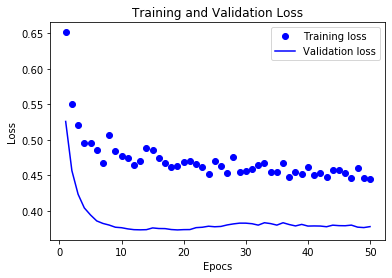

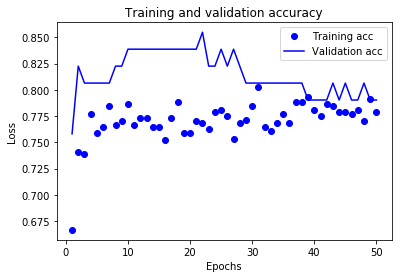

In [18]:
import matplotlib.pyplot as plt
import matplotlib

loss = history.history["loss"]
validation_loss = history.history["val_loss"]
epochs = range(1 , len(loss) + 1)
plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, validation_loss, "b", label = "Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epocs")
plt.ylabel("Loss")
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
def experimenting(batch_size, epochs, drop_ratio):
    print("batch_size: ", batch_size, "\n")
    print("epochs: ", epochs, "\n")
    print("drop_ratio: ", drop_ratio, "\n")
    
    model = Sequential()
    model.add(Dense(16, input_shape = (8,)))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation = "relu"))
    model.add(Dense(2, activation = "softmax"))
    
    model.compile(optimizer = "rmsprop",
                 loss = "binary_crossentropy",
                 metrics = ["acc"])
    
    history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 2, validation_split = 0.1)

In [20]:
batch_size = 20
epochs = 50
drop_ration = 0.3
experimenting(batch_size, epochs, drop_ration)

batch_size:  20 

epochs:  50 

drop_ratio:  0.3 

Train on 552 samples, validate on 62 samples
Epoch 1/50
552/552 - 1s - loss: 0.7140 - acc: 0.5652 - val_loss: 0.6287 - val_acc: 0.6935
Epoch 2/50
552/552 - 0s - loss: 0.6436 - acc: 0.6630 - val_loss: 0.5648 - val_acc: 0.7581
Epoch 3/50
552/552 - 0s - loss: 0.5773 - acc: 0.6938 - val_loss: 0.5229 - val_acc: 0.7903
Epoch 4/50
552/552 - 0s - loss: 0.5509 - acc: 0.7156 - val_loss: 0.4884 - val_acc: 0.7903
Epoch 5/50
552/552 - 0s - loss: 0.5432 - acc: 0.7228 - val_loss: 0.4641 - val_acc: 0.7903
Epoch 6/50
552/552 - 0s - loss: 0.5356 - acc: 0.7083 - val_loss: 0.4456 - val_acc: 0.7903
Epoch 7/50
552/552 - 0s - loss: 0.5331 - acc: 0.7264 - val_loss: 0.4308 - val_acc: 0.7903
Epoch 8/50
552/552 - 0s - loss: 0.5230 - acc: 0.7464 - val_loss: 0.4217 - val_acc: 0.8065
Epoch 9/50
552/552 - 0s - loss: 0.5024 - acc: 0.7572 - val_loss: 0.4145 - val_acc: 0.7903
Epoch 10/50
552/552 - 0s - loss: 0.5018 - acc: 0.7518 - val_loss: 0.4081 - val_acc: 0.7903
Epo

In [21]:
evaluation = model.evaluate(x_test, y_test, verbose = 0)
    
print("\t Test Loss: ", evaluation[0])
print("\t Test Accuracy: ", evaluation[1])

	 Test Loss:  0.5377893211779656
	 Test Accuracy:  0.72727275


In [24]:
pred = model.predict_classes(x_test)[2]
pred

0

In [25]:
y_test[2]

array([1., 0.], dtype=float32)